**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

1) Aplique os filtros  Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

C:\Users\gabri\AppData\Local\Temp\ipykernel_13276\852231863.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plots.show()


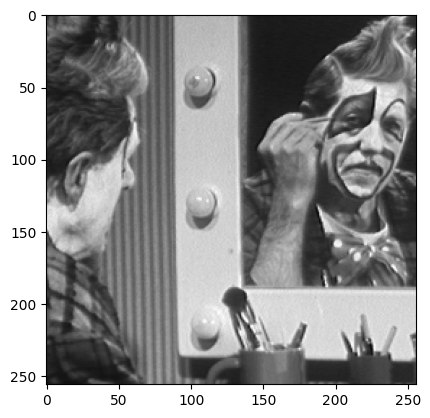

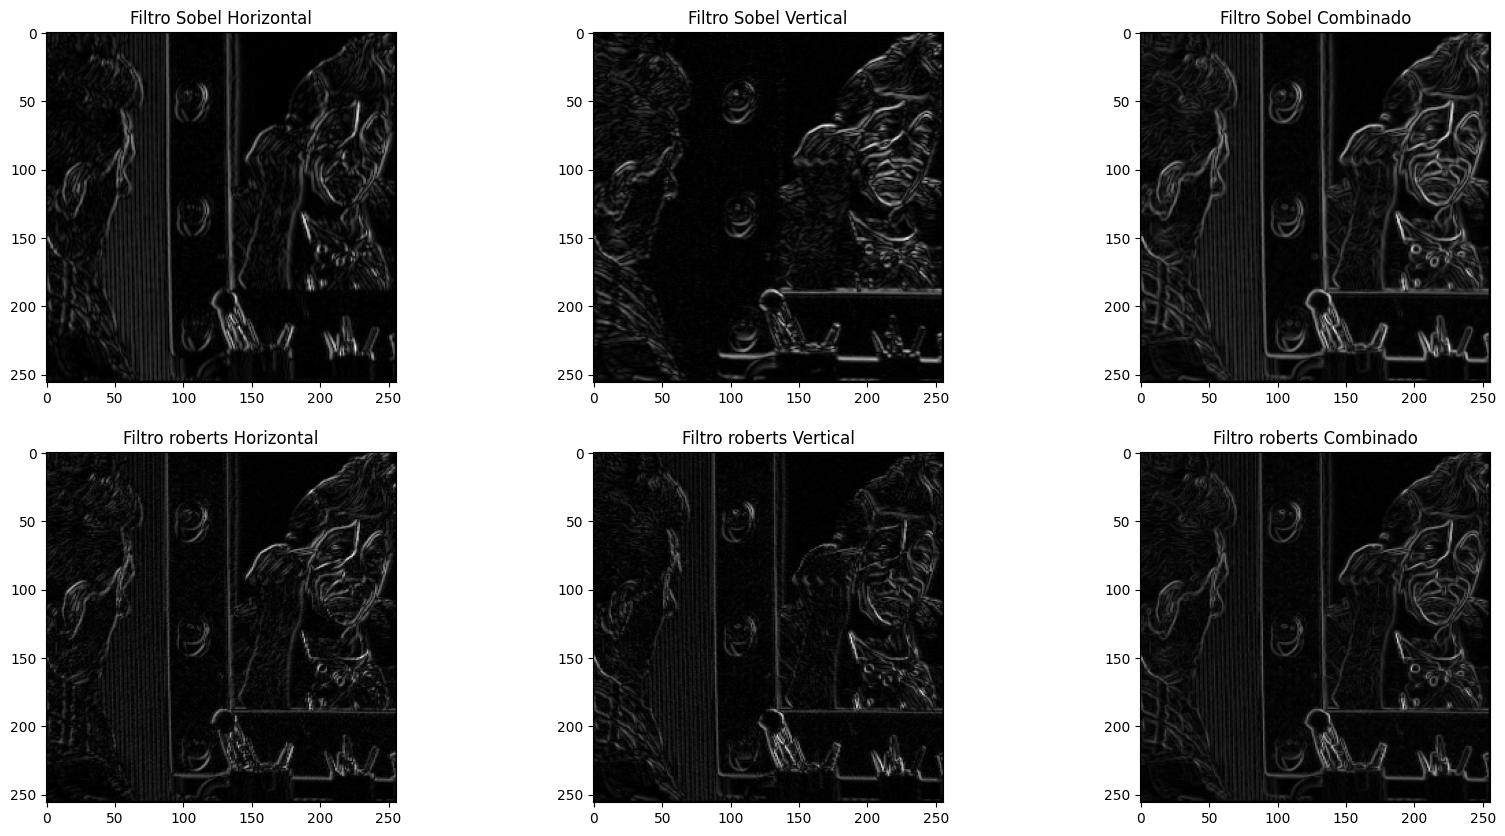

In [8]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

def sobel(linhas, colunas, img): 
    kernel_x = np.array([[1.0, 0.0, -1.0], 
                         [2.0, 0.0, -2.0], 
                         [1.0, 0.0, -1.0]])
    
    kernel_y = np.array([[1.0, 2.0, 1.0], 
                         [0.0, 0.0, 0.0], 
                         [-1.0, -2.0, -1.0]])
    
    sobel_x  = np.zeros(shape=(linhas, colunas))
    sobel_y  = np.zeros(shape=(linhas, colunas))
    sobel_xy = np.zeros(shape=(linhas, colunas))

    for i in range(linhas - 2):
        for j in range(colunas - 2):
            gx = np.sum(np.multiply(kernel_x, img[i:i + 3, j:j + 3]))  
            gy = np.sum(np.multiply(kernel_y, img[i:i + 3, j:j + 3]))  
            sobel_x[i + 1, j + 1] = np.abs(gx)  
            sobel_y[i + 1, j + 1] = np.abs(gy)  
            sobel_xy[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  

    return [sobel_x, sobel_y, sobel_xy]

def roberts(linhas, colunas, img):
    kernel_x = np.array([[1.0, 0.0], [0.0, -1.0]])
    kernel_y = np.array([[0.0, 1.0], [-1.0, 0.0]])

    roberts_x = np.zeros(shape=(linhas, colunas))
    roberts_y = np.zeros(shape=(linhas, colunas))
    roberts_xy = np.zeros(shape=(linhas, colunas))

    for i in range(linhas - 1):  
        for j in range(colunas - 1):
            gx = np.sum(np.multiply(kernel_x, img[i:i + 2, j:j + 2]))  
            gy = np.sum(np.multiply(kernel_y, img[i:i + 2, j:j + 2]))  
            roberts_x[i, j] = np.abs(gx)
            roberts_y[i, j] = np.abs(gy)
            roberts_xy[i, j] = np.sqrt(gx ** 2 + gy ** 2)

    return [roberts_x, roberts_y, roberts_xy]


linhas, colunas = np.shape(img1)

sobel_x, sobel_y, sobel_xy       = sobel(linhas, colunas, img1)
roberts_x, roberts_y, roberts_xy = roberts(linhas, colunas, img1)

plots = plt.figure(figsize=(20, 10))

ax1 = plots.add_subplot(231)
ax1.imshow(sobel_x, cmap=plt.get_cmap('gray'))
ax1.set_title("Filtro Sobel Horizontal")

ax2 = plots.add_subplot(232)
ax2.imshow(sobel_y, cmap=plt.get_cmap('gray'))
ax2.set_title("Filtro Sobel Vertical")

ax3 = plots.add_subplot(233)
ax3.imshow(sobel_xy, cmap=plt.get_cmap('gray'))
ax3.set_title("Filtro Sobel Combinado")

ax4 = plots.add_subplot(234)
ax4.imshow(roberts_x, cmap=plt.get_cmap('gray'))
ax4.set_title("Filtro roberts Horizontal")

ax5 = plots.add_subplot(235)
ax5.imshow(roberts_y, cmap=plt.get_cmap('gray'))
ax5.set_title("Filtro roberts Vertical")

ax6 = plots.add_subplot(236)
ax6.imshow(roberts_xy, cmap=plt.get_cmap('gray'))
ax6.set_title("Filtro roberts Combinado")

plots.show()

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

Text(0.5, 1.0, 'Highboost filtering (k = 0.5)')

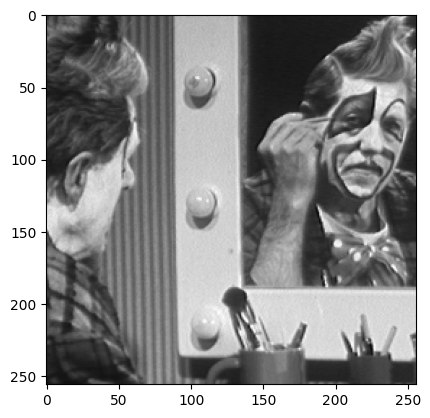

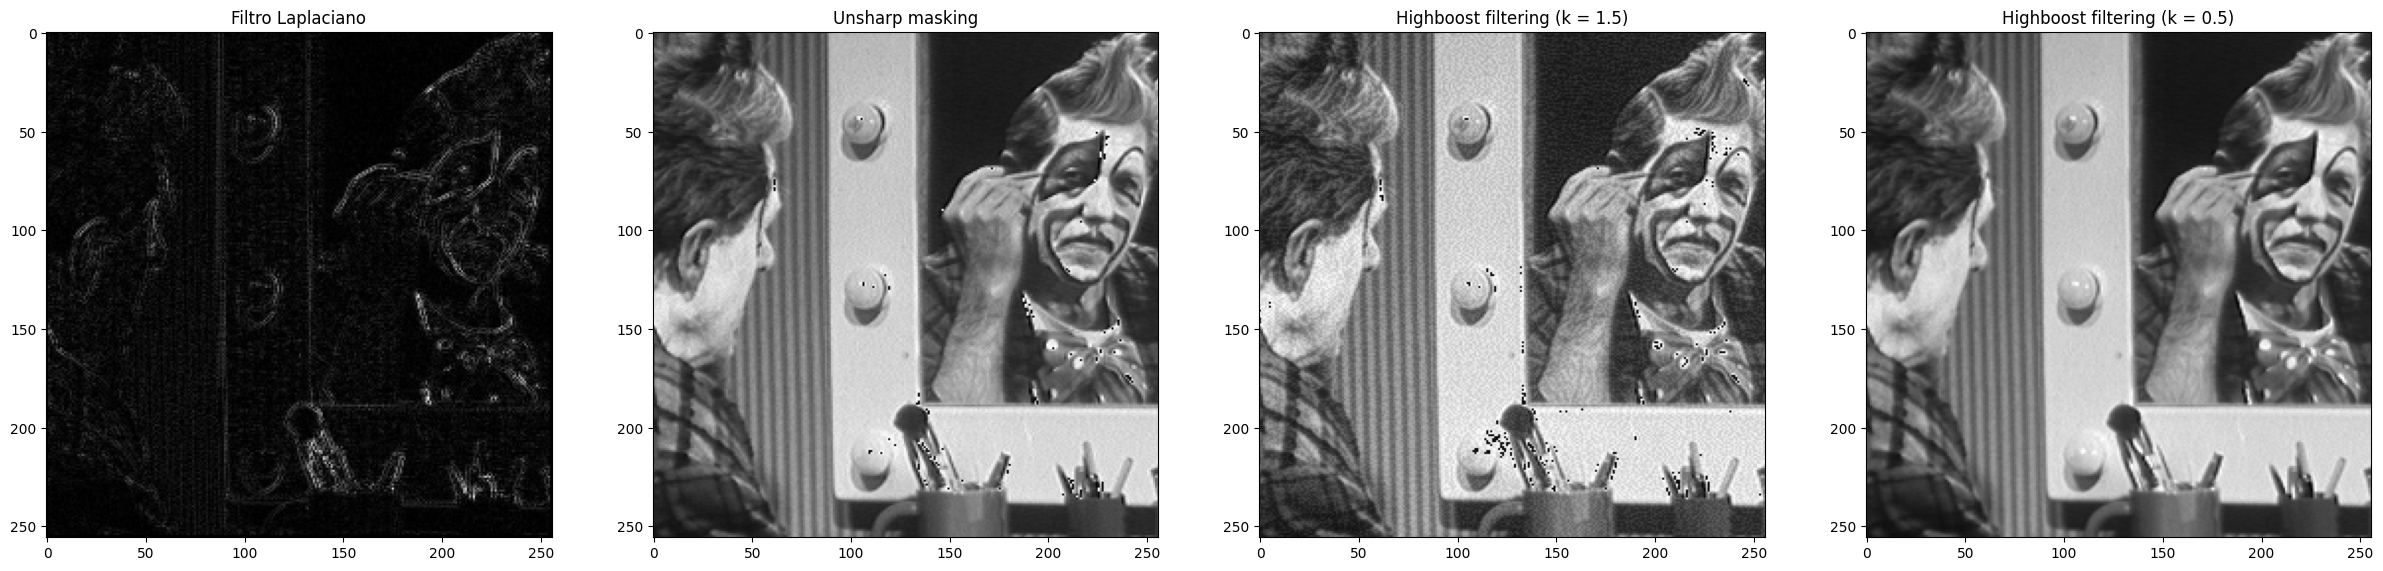

In [15]:
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

def laplaciano(linhas, colunas, img):
    matriz = np.array([[0.0, -1.0, 0.0], 
                       [-1.0, 4.0, -1.0], 
                       [0.0, -1.0, 0.0]])
    
    laplaciano_img = np.zeros(shape=(linhas, colunas))
    
    for i in range(linhas - 2):
        for j in range(colunas - 2):
            result = np.sum(np.multiply(matriz, img[i:i + 3, j:j + 3]))
            laplaciano_img[i + 1, j + 1] = np.abs(result)
    
    return laplaciano_img

def unsharp_masking(img, sigma=0.25, amount=1):
    img_suavizada = gaussian_filter(img, sigma=sigma)
    
    detalhes = img - img_suavizada
    
    img_unsharp = img + amount * detalhes
    
    img_unsharp = np.clip(img_unsharp, 0, 255)
    
    return img_unsharp

def highboost_filtering(img, sigma=1, k=10):
    img_suavizada = gaussian_filter(img, sigma=sigma)
    
    mascara = img - img_suavizada
    
    img_highboost = img + k * mascara
    
    img_highboost = np.clip(img_highboost, 0, 255)
    
    return img_highboost


linhas, colunas = np.shape(img1)

img_laplaciana = laplaciano(linhas, colunas, img1)

img_unsharp = unsharp_masking(img1, sigma = 0.5)

img_highboost1 = highboost_filtering(img1, sigma = 0.25)

img_highboost2 = highboost_filtering(img1, k=0.1, sigma = 0.25)

plots = plt.figure(figsize=(30, 10))

ax1 = plots.add_subplot(141)
ax1.imshow(img_laplaciana, cmap=plt.get_cmap('gray'))
ax1.set_title("Filtro Laplaciano")

ax2 = plots.add_subplot(142)
ax2.imshow(img_unsharp, cmap=plt.get_cmap('gray'))
ax2.set_title("Unsharp masking")

ax3 = plots.add_subplot(143)
ax3.imshow(img_highboost1, cmap=plt.get_cmap('gray'))
ax3.set_title("Highboost filtering (k = 1.5)")

ax4 = plots.add_subplot(144)
ax4.imshow(img_highboost2, cmap=plt.get_cmap('gray'))
ax4.set_title("Highboost filtering (k = 0.5)")

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

Text(0.5, 1.0, 'Imagem com filtro Sobel + normalizada')

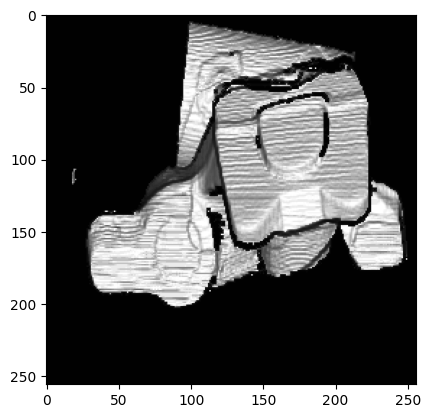

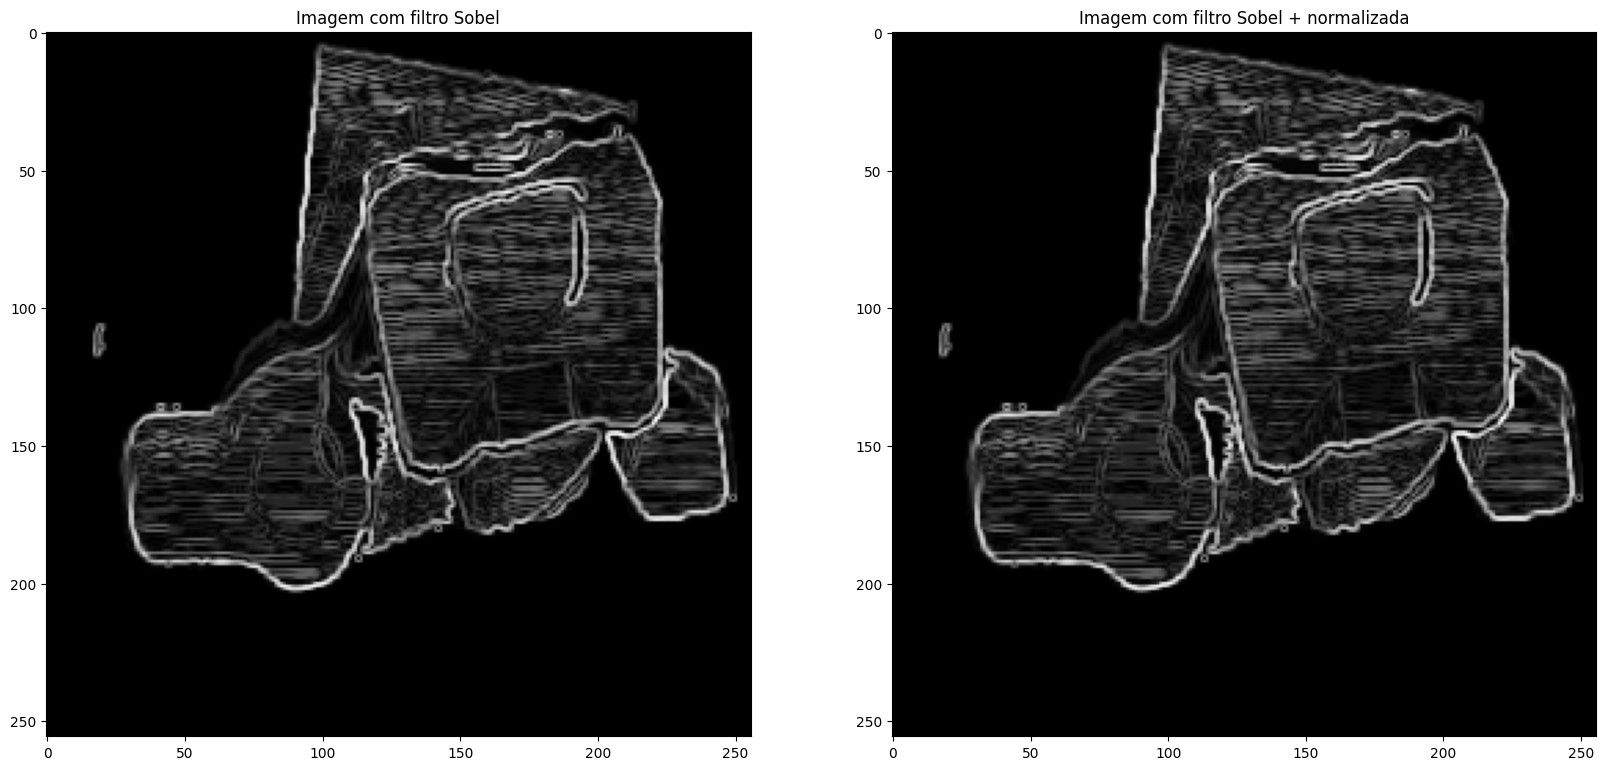

In [13]:
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

linhas, colunas = np.shape(img1)
_, _, img_sobel = sobel(linhas, colunas, img1)

sobel_min = np.min(img_sobel)
sobel_max = np.max(img_sobel)

img_sobel_normalizada = ((img_sobel - sobel_min) / (sobel_max - sobel_min)) * 255

plots = plt.figure(figsize=(20, 10))

ax1 = plots.add_subplot(121)
ax1.imshow(img_sobel, cmap=plt.get_cmap('gray'))
ax1.set_title("Imagem com filtro Sobel")

ax2 = plots.add_subplot(122)
ax2.imshow(img_sobel_normalizada, cmap=plt.get_cmap('gray'))
ax2.set_title("Imagem com filtro Sobel + normalizada")

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

Text(0.5, 1.0, 'Imagem com filtro Sobel binarizada com threshold = 150')

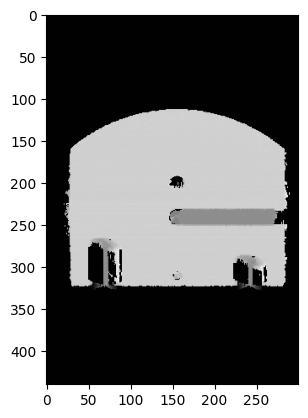

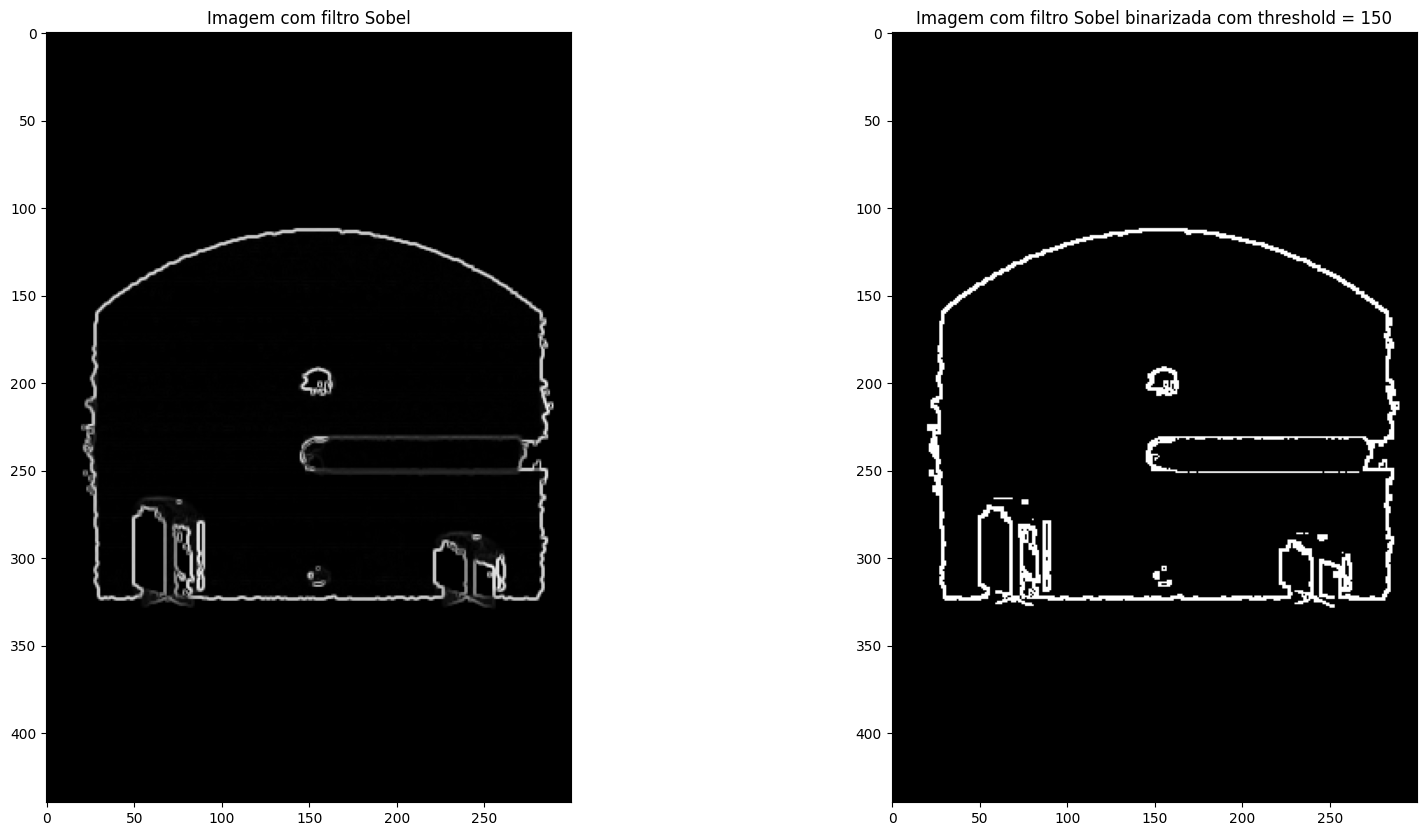

In [14]:
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

linhas, colunas = np.shape(img1)

_, _, img_sobel = sobel(linhas, colunas, img1)

_, img_binarizada = cv2.threshold(img_sobel, 150, 255, cv2.THRESH_BINARY)

plots = plt.figure(figsize=(20, 10))

ax1 = plots.add_subplot(121)
ax1.imshow(img_sobel, cmap=plt.get_cmap('gray'))
ax1.set_title("Imagem com filtro Sobel")

ax2 = plots.add_subplot(122)
ax2.imshow(img_binarizada, cmap=plt.get_cmap('gray'))
ax2.set_title("Imagem com filtro Sobel binarizada com threshold = 150")

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

Text(0.5, 1.0, 'Imagem com filtro Sobel binarizada com threshold = 150')

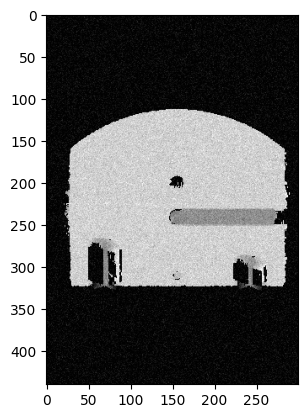

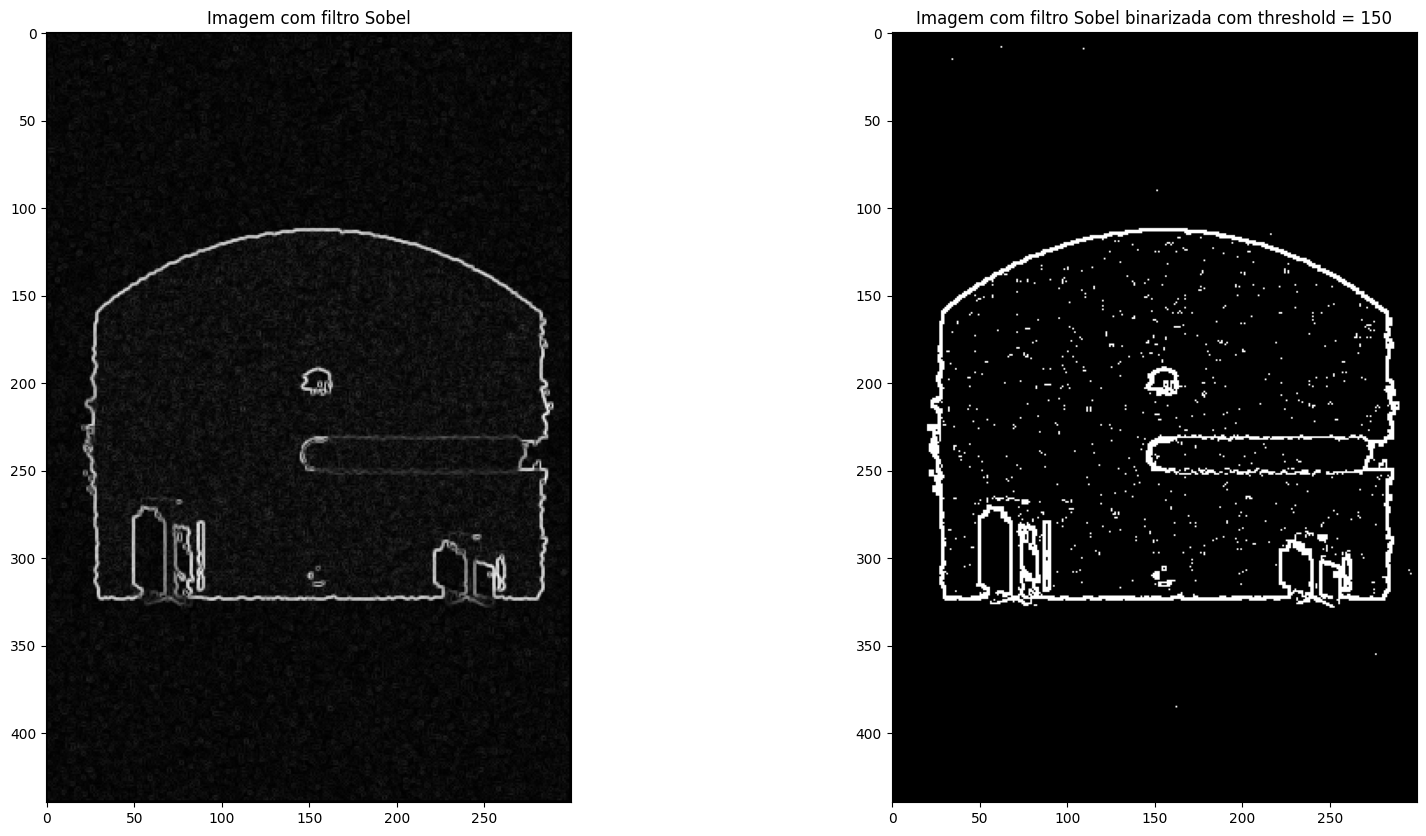

In [15]:
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

linhas, colunas = np.shape(img1)

_, _, img_sobel = sobel(linhas, colunas, img1)

_, img_binarizada = cv2.threshold(img_sobel, 150, 255, cv2.THRESH_BINARY)

plots = plt.figure(figsize=(20, 10))

ax1 = plots.add_subplot(121)
ax1.imshow(img_sobel, cmap=plt.get_cmap('gray'))
ax1.set_title("Imagem com filtro Sobel")

ax2 = plots.add_subplot(122)
ax2.imshow(img_binarizada, cmap=plt.get_cmap('gray'))
ax2.set_title("Imagem com filtro Sobel binarizada com threshold = 150")